In [21]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from keras import models, layers, optimizers
from sklearn.cluster import KMeans


%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

sns.set(palette="Set2")

In [22]:
dfmp = pd.read_csv('votematrix-2017.csv').fillna('')
dfmap = pd.read_csv('mp_mapping.csv').fillna('')

In [23]:
dfmp

,rowid,date,voteno,Bill,mpid41371,mpid41372,mpid41373,mpid41374,mpid41375,mpid41376,...,mpid42720,mpid42721,mpid42723,mpid42724,mpid42725,mpid42726,mpid42727,mpid42728,mpid42729,Unnamed: 1342
0,34477,23/10/2020,155,Prayers - <i> [Mr Speaker in the Chair] </i>,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,
1,34474,21/10/2020,154,Free School Meals,-9,-9,-9,-9,-9,-9,...,4,4,4,4,4,4,2,-9,4,
2,34473,21/10/2020,153,Additional Covid-19 Restrictions: Fair Economi...,-9,-9,-9,-9,-9,-9,...,4,-9,4,4,4,4,2,2,4,
3,34465,21/10/2020,152,Deferred Divisions - Community Infrastructure ...,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
4,34464,21/10/2020,151,Deferred Divisions - Public Health,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
5,34463,21/10/2020,150,Deferred Divisions - Public Health,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
6,34462,21/10/2020,149,Deferred Divisions - Insolvency,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
7,34461,21/10/2020,148,Deferred Divisions - Exiting the European Unio...,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,4,2,
8,34457,19/10/2020,147,Immigration and Social Security Co-ordination ...,-9,-9,-9,-9,-9,-9,...,2,2,2,2,2,2,4,4,2,
9,34456,19/10/2020,146,Immigration and Social Security Co-ordination ...,-9,-9,-9,-9,-9,-9,...,2,2,2,2,2,2,4,4,4,


In [24]:
dfmp = dfmp.drop(columns=['rowid','date','Bill'],axis=1).T.drop(['voteno'],axis=0).drop(columns=[    613],axis=1)

In [25]:
dfmp

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
mpid41371,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,4,2,2,2,2,2,4,-9,2
mpid41372,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,4,2,2,2,2,2,4,-9,2
mpid41373,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,4,2,2,2,2,2,4,-9,2
mpid41374,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,4,2,2,2,2,2,4,-9,2
mpid41375,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,2,4,4,4,4,4,2,4,4
mpid41376,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,4,2,2,2,2,2,4,-9,2
mpid41377,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,4,2,2,2,2,2,4,2,2
mpid41378,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,2,4,4,4,4,4,2,4,4
mpid41379,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,2,4,4,4,4,4,2,4,4
mpid41380,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,2,4,4,4,4,4,2,4,4


In [26]:
dfmap['name']=dfmap['firstname']+dfmap['surname']

dfmap['mpid']='mpid'
dfmap['mpid']=dfmap['mpid']+dfmap['mlid'].astype(str)

dfmp = dfmp.join(dfmap.set_index('mpid')).drop(['mlid','firstname','surname','party','PublicWhip URL'],axis=1)
dfmp

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,name
mpid41371,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,2,2,2,2,2,4,-9,2,BridgetPhillipson
mpid41372,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,2,2,2,2,2,4,-9,2,ChiOnwurah
mpid41373,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,2,2,2,2,2,4,-9,2,JulieElliott
mpid41374,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,2,2,2,2,2,4,-9,2,NickBrown
mpid41375,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,4,4,4,4,4,2,4,4,JustinTomlinson
mpid41376,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,2,2,2,2,2,4,-9,2,SharonHodgson
mpid41377,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,4,2,2,2,2,2,4,2,2,CatherineMcKinnell
mpid41378,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,4,4,4,4,4,2,4,4,PhilipHollobone
mpid41379,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,4,4,4,4,4,2,4,4,MarcusJones
mpid41380,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,4,4,4,4,4,2,4,4,CharlesWalker


In [27]:
dfmp2=pd.DataFrame(dfmp.groupby(['name']).sum())
dfmp2

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
name,,,,,,,,,,,,,,,,,,,,,
AaronBell,-9.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
AbenaOppong-Asare,-9.0,2.0,2.0,4.0,-9.0,-9.0,-9.0,4.0,4.0,4.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
AdamAfriyie,-18.0,-5.0,-5.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,...,-7.0,-7.0,-5.0,-5.0,-5.0,-5.0,-5.0,-7.0,-5.0,-5.0
AdamHolloway,-18.0,-5.0,-5.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,...,-7.0,-7.0,-5.0,-5.0,-5.0,-5.0,-5.0,-7.0,-5.0,-5.0
AdrianBailey,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,4.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
AfzalKhan,-18.0,-7.0,-7.0,-5.0,-18.0,-18.0,-18.0,-5.0,-5.0,-5.0,...,-5.0,-5.0,-7.0,-18.0,-7.0,-7.0,-7.0,-5.0,-18.0,-7.0
AlanBrown,-18.0,-7.0,-7.0,-18.0,-18.0,-18.0,-18.0,-5.0,-5.0,-5.0,...,-5.0,-5.0,-7.0,-7.0,-7.0,-7.0,-7.0,-5.0,-7.0,-7.0
AlanCampbell,-18.0,-7.0,-7.0,-5.0,-18.0,-18.0,-18.0,-5.0,-5.0,-5.0,...,-5.0,-5.0,-7.0,-7.0,-7.0,-7.0,-7.0,-5.0,-18.0,-7.0
AlanDuncan,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0


In [28]:
dfmp2=dfmp2.replace(-18.0,-9.0).replace(-8.0,1.0).replace(-7.0,2.0).replace(-5.0,4.0).replace(-4.0,5.0)

In [29]:
dfmp2

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
name,,,,,,,,,,,,,,,,,,,,,
AaronBell,-9.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
AbenaOppong-Asare,-9.0,2.0,2.0,4.0,-9.0,-9.0,-9.0,4.0,4.0,4.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
AdamAfriyie,-9.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0
AdamHolloway,-9.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0
AdrianBailey,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,4.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
AfzalKhan,-9.0,2.0,2.0,4.0,-9.0,-9.0,-9.0,4.0,4.0,4.0,...,4.0,4.0,2.0,-9.0,2.0,2.0,2.0,4.0,-9.0,2.0
AlanBrown,-9.0,2.0,2.0,-9.0,-9.0,-9.0,-9.0,4.0,4.0,4.0,...,4.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
AlanCampbell,-9.0,2.0,2.0,4.0,-9.0,-9.0,-9.0,4.0,4.0,4.0,...,4.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,-9.0,2.0
AlanDuncan,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0


In [30]:
dfmp2=dfmp2.replace(2,1).replace(4,0).replace(5,0).replace(-9,0.5)

In [31]:
dfmp2

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
name,,,,,,,,,,,,,,,,,,,,,
AaronBell,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
AbenaOppong-Asare,0.5,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
AdamAfriyie,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AdamHolloway,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AdrianBailey,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
AfzalKhan,0.5,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,0.5,1.0
AlanBrown,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
AlanCampbell,0.5,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0
AlanDuncan,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
dfmp2 = dfmp2.apply(pd.to_numeric).fillna(0)

In [37]:
dfmp3 = dfmp2.apply(lambda x : (x - x.mean())/x.std(), axis = 0)

In [39]:
dfmp3[0].mean()

-2.647374740509486e-16

In [42]:
dfmp5 = dfmp3.fillna(0)

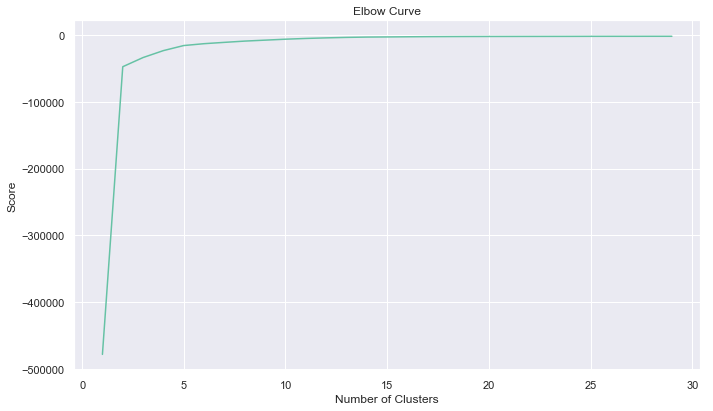

In [43]:

n_cluster = range(1,30)
kmeans = [KMeans(n_clusters=i).fit(dfmp5) for i in n_cluster]
scores = [kmeans[i].score(dfmp5) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [44]:
X = dfmp5
km = KMeans(n_clusters=5)
km.fit(X)
X['cluster']=km.predict(X)

In [45]:
temp=X['cluster']
temp=pd.DataFrame(temp)

In [46]:
temp['name']=temp.index

In [16]:
dfmap

,mlid,firstname,surname,party,PublicWhip URL,name,mpid
0,41744,John,[Missing last name for 41744],Lab,https://www.publicwhip.org.uk/mp.php?mpid=41744,John[Missing last name for 41744],mpid41744
1,41707,Diane,Abbott,Lab,https://www.publicwhip.org.uk/mp.php?mpid=41707,DianeAbbott,mpid41707
2,42461,Diane,Abbott,Lab,https://www.publicwhip.org.uk/mp.php?mpid=42461,DianeAbbott,mpid42461
3,41713,Debbie,Abrahams,Lab,https://www.publicwhip.org.uk/mp.php?mpid=41713,DebbieAbrahams,mpid41713
4,42497,Debbie,Abrahams,Lab,https://www.publicwhip.org.uk/mp.php?mpid=42497,DebbieAbrahams,mpid42497
5,41699,Nigel,Adams,Con,https://www.publicwhip.org.uk/mp.php?mpid=41699,NigelAdams,mpid41699
6,42560,Nigel,Adams,Con,https://www.publicwhip.org.uk/mp.php?mpid=42560,NigelAdams,mpid42560
7,41725,Bim,Afolami,Con,https://www.publicwhip.org.uk/mp.php?mpid=41725,BimAfolami,mpid41725
8,42559,Bim,Afolami,Con,https://www.publicwhip.org.uk/mp.php?mpid=42559,BimAfolami,mpid42559
9,41732,Adam,Afriyie,Con,https://www.publicwhip.org.uk/mp.php?mpid=41732,AdamAfriyie,mpid41732


In [47]:
temp2 = temp.join(dfmap.set_index('name')).drop(columns=['mlid','mpid','PublicWhip URL','surname','firstname']).drop_duplicates()

Cluster 0


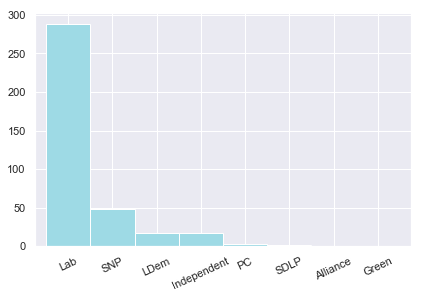

Cluster 1


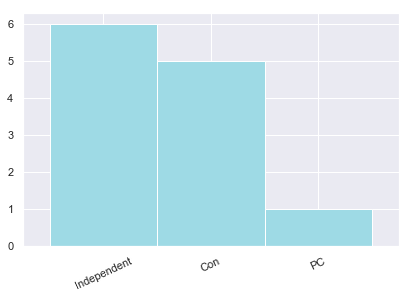

Cluster 2


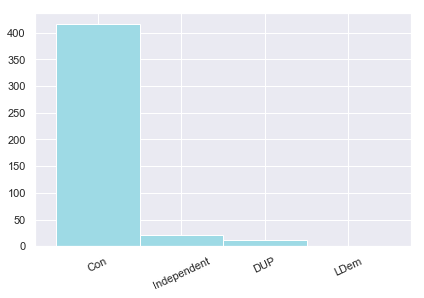

Cluster 3


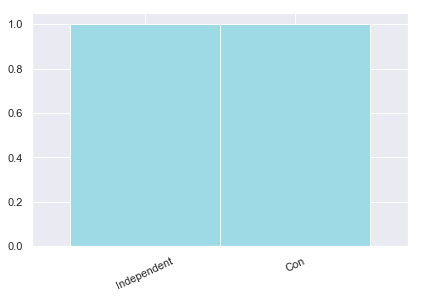

Cluster 4


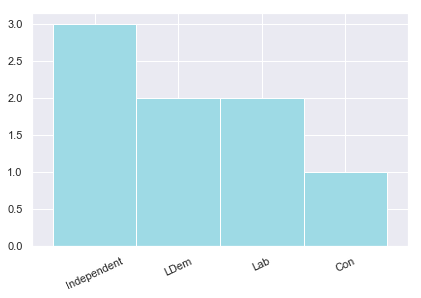

In [48]:
for i in range (0,5):
    print('Cluster '+str(i))
    temp2[temp2['cluster']==i]['party'].value_counts().plot(kind='bar',width=1,cmap='tab20_r')
    plt.xticks(rotation=25)
    plt.show()

In [49]:
for i in range(0,5):
    print(temp2[temp2['cluster']==i][['party','cluster']].sort_values('party'))

                          party  cluster
name                                    
StephenFarry           Alliance        0
CarolineLucas             Green        0
NealeHanvey         Independent        0
StephenLloyd        Independent        0
SylviaHermon        Independent        0
AnnCoffey           Independent        0
GavinShuker         Independent        0
KelvinHopkins       Independent        0
AngelaSmith         Independent        0
IvanLewis           Independent        0
FrankField          Independent        0
MikeGapes           Independent        0
JoanRyan            Independent        0
JaredO&#39;Mara     Independent        0
LucianaBerger       Independent        0
FionaOnasanya       Independent        0
ChrisLeslie         Independent        0
JohnWoodcock        Independent        0
IanAustin           Independent        0
LaylaMoran                 LDem        0
ChristineJardine           LDem        0
WeraHobhouse               LDem        0
WendyChamberlain

In [20]:
temp2[['party','cluster']].sort_values('party').to_csv('MP_Clusters.csv')